**Import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed (0) # please do not remove this line
%matplotlib inline

In [3]:
# Question 2
def load_data_from_file(fileName = "/content/dataset/advertising.csv"):
    data = np.genfromtxt(fileName, dtype = None, delimiter = ',', skip_header = 1)
    features_X = data[:, :3]
    sales_Y = data [:, 3]

    # ****** your code here ******************
    features_X = np.hstack((np.ones((features_X.shape[0], 1)), features_X))
    return features_X, sales_Y


features_X, _ = load_data_from_file()
print(features_X[:5, :])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [4]:
# Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


**Exercise 2**

In [5]:
def create_individual(n = 4, bound = 10):
    individual = [np.random.uniform(-bound / 2, bound / 2) for _ in range(4)]
    return individual


individual = create_individual()
print(individual)

# sample result: [[4.097462559682401, 4.827854760376531, 3.1021723599658957, 4.021659504395827]]

[-0.9375647573698966, 3.6992595321714425, 2.313973096613714, -0.4788950849109419]


**Exercise 3**

In [8]:
features_X, sales_Y = load_data_from_file()

def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat - sales_Y), (y_hat - sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 1 / (loss + 1)
    return fitness_value

# Question 4
features_X , sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


**Exercise 4**

In [10]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
    return individual1_new , individual2_new


In [11]:
# Question 5

individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


**Exercise 5**

In [12]:
def mutate(individual, mutation_rate = 0.05, bound = 10):
    individual_m = individual.copy()
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_m[i] = random.uniform(-bound / 2, bound / 2)
    return individual_m

In [13]:
# Question 6

before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


**Exercise 6**

In [14]:
def initializePopulation(m):
    population = [create_individual() for _ in range (m)]
    return population

**Exercise 7**

In [15]:
def selection(sorted_old_population, m = 100):
    index1 = random.randint(0, m - 1)
    while True:
        index2 = random.randint(0, m - 1)
        if (index2 != index1):
            break
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    return individual_s

**Exercise 8**

In [17]:
def create_new_population(old_population, elitism = 2, gen = 1):
    print(gen)
    m = len(old_population)
    sorted_population = sorted(old_population, key = compute_fitness)
    if gen % 1 == 0:
        print("Best loss: ", compute_loss(sorted_population[m - 1]), " with chromsome: ", sorted_population[m - 1])
    new_population = []
    while len(new_population) < m - elitism:
        # selection
        individual1 = selection(sorted_population, m = m)
        individual2 = selection(sorted_population, m = m)
        # crossover
        individual1, individual2 = crossover(individual1, individual2)
        # mutation
        individual1 = mutate(individual1)
        individual2 = mutate(individual2)
        # copy elitism chromosomes that have best fitness score to the next generation
        for ind in sorted_population[m - elitism :]:
            new_population.append(ind)
    return new_population, compute_loss(sorted_population[m - 1])

In [18]:
# Question 7

individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism = 2, gen = 1)

1
Best loss:  123415.051528805  with chromsome:  [3.44, 2.57, -0.79, -2.41]


**Exercise 9 + 10**

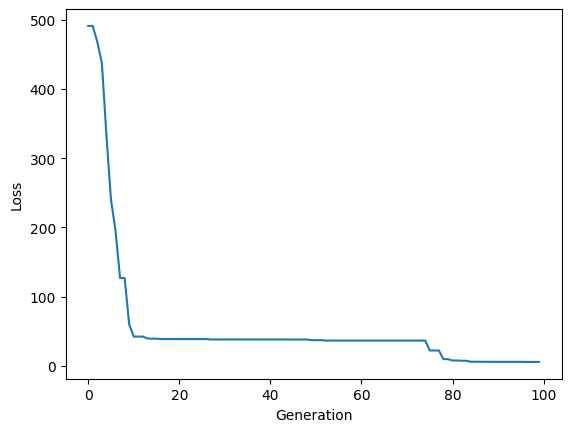

In [19]:
def create_new_population(old_population, elitism = 2, gen = 1):
    m = len(old_population)
    sorted_population = sorted(old_population, key = compute_fitness)
    new_population = []
    while len(new_population) < m - elitism:
        # selection
        individual1 = selection(sorted_population, m = m)
        individual2 = selection(sorted_population, m = m)
        # crossover
        individual1, individual2 = crossover(individual1, individual2)
        # mutation
        individual1 = mutate(individual1)
        individual2 = mutate(individual2)
        # copy elitism chromosomes that have best fitness score to the next generation
        new_population.append(individual1)
        new_population.append(individual2)
        for ind in sorted_population[m - elitism :]:
            new_population.append(ind)
    return new_population, compute_loss(sorted_population[-1])


def run_GA():
    n_generations = 100
    m = 600
    features_X, sales_Y = load_data_from_file()
    population = initializePopulation(m)
    losses_list = []
    for i in range (n_generations):
        population, loss = create_new_population(population, elitism = 2, gen = features_X.shape[1])
        losses_list.append(loss)
    return losses_list


def visualize_loss(losses_list):
    plt.plot(losses_list)
    plt.xlabel("Generation")
    plt.ylabel("Loss")
    plt.show()


losses_list = run_GA()
visualize_loss(losses_list)

**Exercise 11:**

[1.108482811551049, 0.08116395188041814, 0.0830398065519633, 0.00726131334528457]


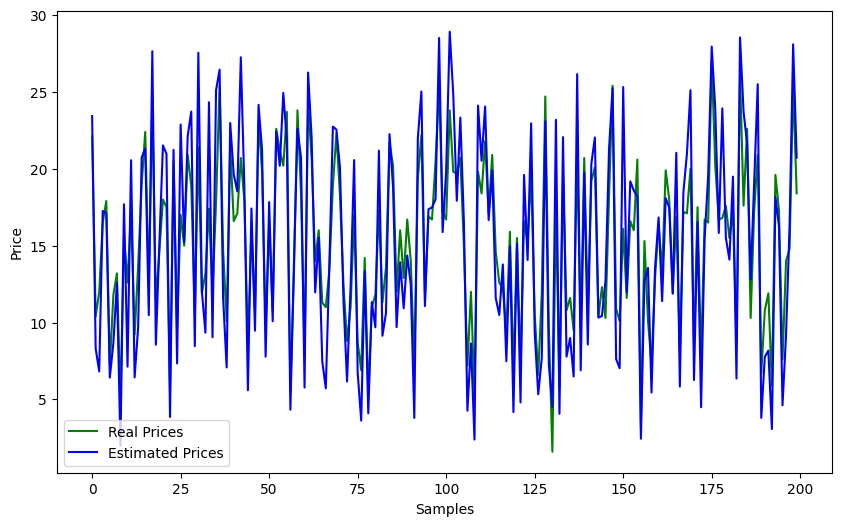

In [20]:
def visualize_predict_gt(population):
    # visualization of ground truth and predict value
    sorted_population = sorted(population, key = compute_fitness)
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])
    estimated_prices = []
    for feature in features_X :
        estimated_prices.append(np.dot(theta, feature))
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel ('Price')
    plt.plot(sales_Y, c ='green', label='Real Prices')
    plt.plot(estimated_prices, c='blue', label='Estimated Prices')
    plt.legend()
    plt.show()


n_generations = 100
m = 600
features_X, sales_Y = load_data_from_file()
population = initializePopulation(m)
losses_list = []
for i in range (n_generations):
    population, loss = create_new_population(population, elitism = 2, gen = features_X.shape[1])
    losses_list.append(loss)

visualize_predict_gt(population)